1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

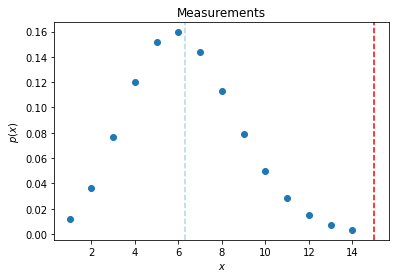

Z = 3.4661629670697414


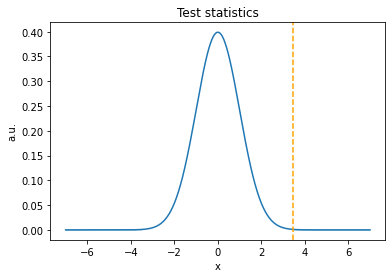

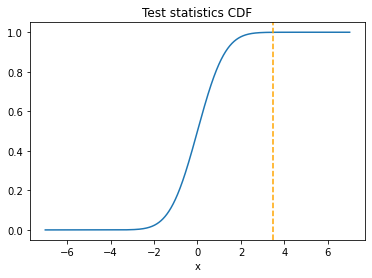

p-value = 0.00026397158691493505
The probability of observing 15 or more hurricances is low


In [4]:
from math import sqrt, pi, erf
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


noh = 15
mu = 6.3

x = np.arange(stats.poisson.ppf(0.009, mu), stats.poisson.ppf(0.9985, mu))
t = stats.poisson.pmf(x, mu)
plt.plot(x, t,'o')
plt.axvline(noh, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

sigma_mu = stats.poisson.std(mu)
Z = (noh - mu) / sigma_mu
print("Z =", Z)

xs = np.linspace(-7, 7, 2000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

pvalue = 1. - stats.norm.cdf(Z)

print("p-value =", pvalue)
print("The probability of observing 15 or more hurricances is low")


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

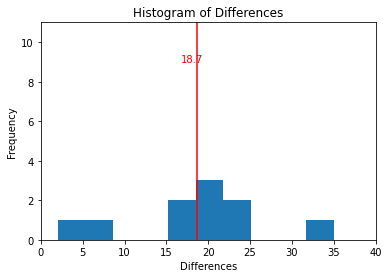

The mean of differences is:  18.7 , which is far away from 0.
Thus, there is the suspect that there is difference between the means
sigma =  10.474970167021958
T =  -3.991846326292112


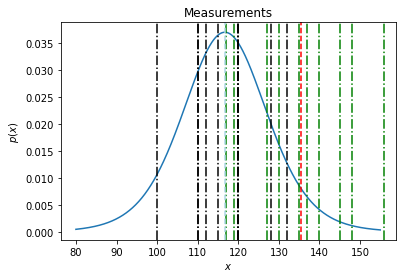

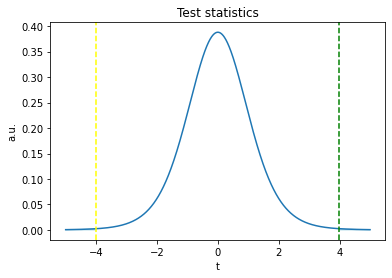

In [11]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
difference = post - pre
 
plt.hist(difference, bins=10) 
plt.axvline(x=np.mean(difference), c ='r')
plt.text(np.mean(difference)-2, 9, round(np.mean(difference),3), c='r')
plt.xlim(0, 40)
plt.ylim(0, 11)
plt.title('Histogram of Differences')
plt.xlabel("Differences")
plt.ylabel("Frequency")
plt.show()

print("The mean of differences is: ", np.mean(difference), ", which is far away from 0.")
print("Thus, there is the suspect that there is difference between the means")

n = len(pre)
pre_mean = np.mean(pre)
pre_std = np.std(pre)

post_mean = np.mean(post)
post_std = np.std(post)

sigma = sqrt((pre_std**2 + post_std**2)/2)
print("sigma = ", sigma)

T = (pre_mean - post_mean) / (sigma * sqrt(2/n))

print("T = ", T)

mu = pre_mean
x = np.linspace(80, 155, 1000)
y = stats.t.pdf(x, loc=mu, scale=sigma, df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(post_mean, linestyle='--', color='red')
for l_pre, l_post in zip(pre, post):
    plt.axvline(l_pre, linestyle='-.', color='black')
    plt.axvline(l_post, linestyle='-.', color='green')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='yellow')
plt.axvline(-T, linestyle='--', color='green')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

parameters:
 [  6.73581486   2.2944277  132.80882439  15.77936937]
covariance matrix:
 [[ 6.31516789e-03 -2.12259790e-04 -2.15142121e-02  1.91673115e-03]
 [-2.12259790e-04  2.75454778e-02  2.17813738e+00 -1.70946022e-01]
 [-2.15142121e-02  2.17813738e+00  2.03817872e+02 -1.61265094e+01]
 [ 1.91673115e-03 -1.70946022e-01 -1.61265094e+01  1.38442457e+00]]
Mean = 6.74 +- 0.08
var = 2.29 +- 0.17
Scale = 132.81 +- 14.28
Offset = 15.78 +- 1.18
parameters:
 [  7.16452593   1.97590026 260.76391445 -61.32093785]
covariance matrix:
 [[ 2.22850101e-03 -4.92556709e-05 -1.08267364e-02  1.09102374e-03]
 [-4.92556709e-05  5.77328577e-03  8.74436393e-01 -7.06522060e-02]
 [-1.08267364e-02  8.74436393e-01  1.78561132e+02 -1.45310919e+01]
 [ 1.09102374e-03 -7.06522060e-02 -1.45310919e+01  1.41331158e+00]]
Mean = 7.16 +- 0.05
var = 1.98 +- 0.08
Scale = 260.76 +- 13.36
Offset = -61.32 +- 1.19


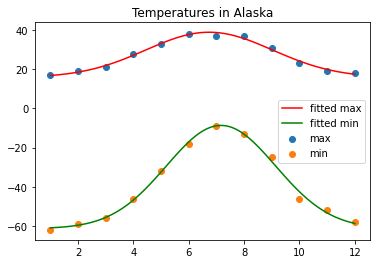

In [14]:
from scipy import optimize

max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

month = np.arange(12) + 1

x = np.linspace(1,12,100)

mean_max = np.average(month, weights=max)

var_max = np.average((month - mean_max)**2, weights=max)

def gau(x, m, v, A , off):
    return A*stats.norm.pdf(x, loc = m, scale = v) + off

popt_max, pcov_max = optimize.curve_fit(gau, month, max, p0=[mean_max, np.sqrt(var_max), 10, 0], full_output=False)
print("parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("Mean = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("var = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("Scale = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("Offset = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))

popt_min, pcov_min = optimize.curve_fit(gau, month, min, p0=[popt_max[0], popt_max[1], 10, 0], full_output=False)
print("parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("Mean = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("var = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("Scale = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("Offset = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))


plt.scatter(month, max, label='max')
plt.scatter(month, min, label='min')
plt.plot(x, gau(x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted max')

plt.plot(x, gau(x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='green', label='fitted min')
plt.legend(loc='best')
plt.title('Temperatures in Alaska')
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

--2023-01-20 17:20:50--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 17:20:50--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e79b0ded32326aaae7a13501c.dl.dropboxusercontent.com/cd/0/inline/B06Ce-MmQtydpfc0T81DKh3SbFG2baB8nYV94ENqOnajMhp4vS1esGTmqBJm_QfwjXFuCpW-jzAhmOJjb3c6VzbC4sBQd4AXpT0XGNtF6hdBAJQua00IGebfx7WYaz3AgRN-YxRAwBnmeMF7JMgHH0U4ucwtJXZ0rYCC0wWLY77SjQ/file# [following]
--2023-01-20 17:20:50--  https://uc9e79b0ded32326aaae7a13501c.dl.dropboxusercontent.com/cd/0/inline/B06Ce-MmQtydpfc0T81DKh3SbFG2baB8nYV94ENqOnajMhp4vS1esGTmqBJm_Qfwj

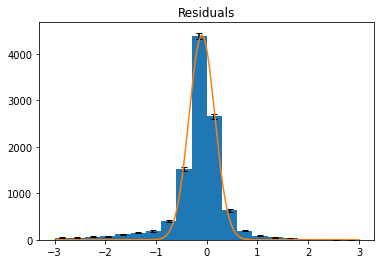

#Degrees of Freedom = 19
chi2 = 16548.53125976331


In [19]:
import pandas as pd
import pickle

!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


infile = open('data/residuals_261.pkl', 'rb')
data = pickle.load(infile).item()
infile.close()

data = data['residuals']

n_bins = 20

n, bins, _ = plt.hist(data, bins=n_bins, range=(-3, +3))
bin_center = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
n_err = np.sqrt(n)
plt.errorbar(bin_center, n, n_err, fmt='none', c='black', capsize=3)

def f(x, S ,m ,v):
    return S*np.exp(-((x - m) ** 2) / (2 * v))

popt, pcov = optimize.curve_fit(f, bin_center, n, p0=[1, 0,  1], full_output=False)

x = np.linspace(-3,3,1000)

plt.plot(x, f(x, popt[0], popt[1], popt[2]))
plt.title('Residuals')
plt.show()

ndof = len(n) - 1
print("#Degrees of Freedom =", ndof)

chi2 = np.sum(((n - (f(bin_center, popt[0], popt[1], popt[2])))**2) / n_err)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.